In [20]:
import misleep

## Load data and crop it

In [3]:
# Load data, use misleep.load_mat() if your data is misleep standard `mat` format, else use misleep.load_edf() if your data is standard `.edf` format
midata = misleep.load_mat(r'./example_data.mat')
# misleep.load_mat will return a MiData class, which contains 'channels', 'sf (sampling frequency)', 'time (acquisition time)' and 'signals' properties
channels = midata.channels
sf = midata.sf
ac_time = midata.time
print(
    f'MiData channels: {channels}\n',
    f'MiData sfs: {sf}\n',
    f'MiData (acquisition) time: {ac_time}\n'
)

MiData channels: ['EEG_P', 'EEG_F', 'EMG_DIFF', 'ACC']
 MiData sfs: [256.0, 256.0, 256.0, 256.0]
 MiData (acquisition) time: 20250913-19:00:00



In [5]:
# For most of the case, you want to get the signal data of each channel, here is an example of geting the 'EEG_P' signal from midata
# Change the channel name if you want to get other channels, like 'ACC' or whatever
eeg_p_channel_signal = midata.signals[channels.index('EEG_P')]

# Once you get the eeg signal, you can get the corresponding sampling frequency (sf) with the same way
eeg_p_channel_sf = midata.sf[channels.index('EEG_P')]
print(f'eeg_p_channel_signal contains {len(eeg_p_channel_signal)} data points, samling frequency is {eeg_p_channel_sf}, '
      f'so total duration (in seconds) is {len(eeg_p_channel_signal)/eeg_p_channel_sf}')

eeg_p_channel_signal contains 22118400 data points, samling frequency is 256.0, so total duration (in seconds) is 86400.0


In [6]:
# In some cases you may want only light phase, or dark phase, or only two hours of signal data, 
# you can crop the signals with 'abusolute seconds' or 'acquisition time'

# Crop data with seting start, end second
start_time_in_second = 0
end_time_in_second = 7200
cropped_eeg_p_channel_signal = eeg_p_channel_signal[int(start_time_in_second*eeg_p_channel_sf) : int(end_time_in_second*eeg_p_channel_sf)]
print(f'eeg_p_channel_signal contains {len(eeg_p_channel_signal)} data points, total duration (in seconds) is {len(eeg_p_channel_signal)/eeg_p_channel_sf}\n'
      f'cropped_eeg_p_channel_signal contains {len(cropped_eeg_p_channel_signal)} data points, total duration (in seconds) is {len(cropped_eeg_p_channel_signal)/eeg_p_channel_sf}\n')

eeg_p_channel_signal contains 22118400 data points, total duration (in seconds) is 86400.0
cropped_eeg_p_channel_signal contains 1843200 data points, total duration (in seconds) is 7200.0



In [8]:
# Crop data with acquisition time
# First thing is transfer the acquisition time into a datetime format
from datetime import datetime
ac_time_datetime_format = datetime.strptime(ac_time, "%Y%m%d-%H:%M:%S")
print(f'ac_time in datetime format: {ac_time_datetime_format}, and we can get the year of datetime by: {ac_time_datetime_format.year}\n')

# With datetime, we can set the crop start and end time like this, just by setting the year, month, day, hour, minute and second
start_crop_time = datetime(year=ac_time_datetime_format.year, month=ac_time_datetime_format.month, 
                         day=ac_time_datetime_format.day, hour=19, minute=0, second=0)
# Or if you want to use the acquisition time as the start crop time:
# start_crop_time = ac_time_datetime_format
end_crop_time = datetime(year=ac_time_datetime_format.year, month=ac_time_datetime_format.month, 
                         day=ac_time_datetime_format.day+1, hour=7, minute=0, second=0)
print(f'you are setting the start crop time: {start_crop_time} and end crop time: {end_crop_time}\n')

# With the start crop time and end crop time, I can crop the data from the whole channel signal
# First thing is locate the crop position with the datetime
start_time_in_second = (start_crop_time - ac_time_datetime_format).total_seconds()  # Get the start position
end_time_in_second = (end_crop_time - ac_time_datetime_format).total_seconds()  # Get the end position
cropped_eeg_p_channel_signal = eeg_p_channel_signal[int(start_time_in_second*eeg_p_channel_sf) : int(end_time_in_second*eeg_p_channel_sf)]
print(f'eeg_p_channel_signal contains {len(eeg_p_channel_signal)} data points, total duration (in seconds) is {len(eeg_p_channel_signal)/eeg_p_channel_sf}\n'
      f'cropped_eeg_p_channel_signal contains {len(cropped_eeg_p_channel_signal)} data points, total duration (in seconds) is {len(cropped_eeg_p_channel_signal)/eeg_p_channel_sf}\n')

ac_time in datetime format: 2025-09-13 19:00:00, and we can get the year of datetime by: 2025

you are setting the start crop time: 2025-09-13 19:00:00 and end crop time: 2025-09-14 07:00:00

eeg_p_channel_signal contains 22118400 data points, total duration (in seconds) is 86400.0
cropped_eeg_p_channel_signal contains 11059200 data points, total duration (in seconds) is 43200.0



## Load annotation and get sleep state group

In [9]:
mianno = misleep.load_misleep_anno(r'./example_annotation.txt')
# misleep.load_misleep_anno() will return a 'MiAnno' class, which contains 'sleep_state', 'start_end' event, and single point 'marker'
sleep_state = mianno.sleep_state  # Each item is the state of each second
sleep_state_map = mianno.state_map
start_end = mianno.start_end
marker = mianno.marker
print(f'sleep state map: {sleep_state_map}')
print(f'first 20 values of sleep state: {sleep_state[:20]}')
print(f'total sleep state in second: {len(sleep_state)}')


sleep state map: {1: 'NREM', 2: 'REM', 3: 'Wake', 4: 'Init'}
first 20 values of sleep state: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
total sleep state in second: 86400


In [10]:
# Also we can crop the sleep state with the same way of cropping data
start_sec = 0
end_sec = 3600
sleep_state_cropped = sleep_state[start_sec: end_sec]
print(f'cropped sleep state in second: {len(sleep_state_cropped)}')

cropped sleep state in second: 3600


In [11]:
# For start_end and marker list, you can check the data yourself and to see how to work with them

# For the most often use sleep_state, misleep offer a 'lst2group' function to organize the continious sleep state
sleep_state_group = misleep.lst2group([[idx, each] for idx, each in enumerate(sleep_state)])
# So the total number of sleep_state_group is the total transition of sleep states
print(f'Total transtions of sleep state is {len(sleep_state_group)}')
print(f'First value of sleep state group: {sleep_state_group[0]}')
print(f'The state group have 3 items, first is the state start time in second: {sleep_state_group[0][0]}, '
      f'second is the state end time in second: {sleep_state_group[0][1]}, '
      f'and the third one is the state code: {sleep_state_group[0][2]}, which you can map it back to state with the {sleep_state_map}')
print(f'So the first value of sleep state group: {sleep_state_group[0]} means this is a {sleep_state_map[sleep_state_group[0][2]]} state, '
      f'start from {sleep_state_group[0][0]}, end at {sleep_state_group[0][1]}, and the bout duration is {sleep_state_group[0][1]-sleep_state_group[0][0]}')

Total transtions of sleep state is 1295
First value of sleep state group: [0, 106, 3]
The state group have 3 items, first is the state start time in second: 0, second is the state end time in second: 106, and the third one is the state code: 3, which you can map it back to state with the {1: 'NREM', 2: 'REM', 3: 'Wake', 4: 'Init'}
So the first value of sleep state group: [0, 106, 3] means this is a Wake state, start from 0, end at 106, and the bout duration is 106


## Extract data with sleep state group

In [12]:
# As we mentioned, we can use start second and end second to extract the data from original channel data, 
# then we can use the sleep state group to extract data, because each of them is [start_second, end_second, sleep_state]

# Here is a example of extract all NREM data
# First thing is we need to all the NREM labels, we can do this by identifying the 'sleep_state==1' in the sleep state group
nrem_state_group = []
for each in sleep_state_group:
    if each[2] == 1:
        nrem_state_group.append(each)
# Or do this in one line
# nrem_state_group = [each for each in sleep_state_group if each[2] == 1]
print(f'we got {len(nrem_state_group)} NREM sleep bout')
print(f'First 10 NREM bout: {nrem_state_group[:10]}')

# TIPS:
# For each bout, it contains start_second and end_second, so we can get the bout duration of each bout
print(f'First NREM bout duraion is {nrem_state_group[0][1] - nrem_state_group[0][0]}s')
# So we can get the average bout duration of NREM state by
print(f'NREM total duration is {sum(each[1]-each[0] for each in nrem_state_group)}s')
print(f'Average bout duration of NREM sleep is {sum([each[1]-each[0] for each in nrem_state_group])/len(nrem_state_group)}')

we got 618 NREM sleep bout
First 10 NREM bout: [[106, 454, 1], [487, 724, 1], [750, 760, 1], [765, 892, 1], [897, 952, 1], [957, 1027, 1], [1061, 1072, 1], [1126, 1137, 1], [1144, 1163, 1], [1178, 1186, 1]]
First NREM bout duraion is 348s
NREM total duration is 41201s
Average bout duration of NREM sleep is 66.66828478964402


In [13]:
# So for all bout NREM signal data, we can iter the nrem_state_group to get the data of each bout
nrem_state_data_lst = []
for each in nrem_state_group:
    start_sec_ = each[0]
    end_sec_ = each[1]
    nrem_bout_data = eeg_p_channel_signal[int(start_sec_*eeg_p_channel_sf) : int(end_sec_*eeg_p_channel_sf)]
    nrem_state_data_lst.append(nrem_bout_data)
# Or do this in one line
# nrem_state_data_lst = [eeg_p_channel_signal[int(each[0]*eeg_p_channel_sf) : int(each[1]*eeg_p_channel_sf)] for each in nrem_state_group]
print(f'we got {len(nrem_state_data_lst)} NREM data bout')

we got 618 NREM data bout


In [14]:
# If we want to conbine all bout nrem state data in one list (flat it), we can:
nrem_state_data_all = [item for each in nrem_state_data_lst for item in each]
print(f'total NREM duration: {len(nrem_state_data_all)/eeg_p_channel_sf}s')

total NREM duration: 41201.0s


## Data processing pipeline

In [15]:
# Load data and annotation file
midata = misleep.load_mat(r'./example_data.mat')
mianno = misleep.load_misleep_anno(r'./example_annotation.txt')

# Get signal data you want to work with, and the signal sampling frequency is essential for all steps
signal_data = midata.signals[midata.channels.index('EEG_P')]
signal_data_sf = midata.sf[midata.channels.index('EEG_P')]

# Get the sleep state in second
sleep_state = mianno.sleep_state

# Crop data and label if you only want to process part of data
# Here is a example if you only want to process the 2nd hour of data
start_second = 3600
end_second = 7200
signal_data_cropped = signal_data[int(start_second*signal_data_sf) : int(end_second*signal_data_sf)]
sleep_state_cropped = sleep_state[start_second: end_second]
print(f'Data total second: {len(signal_data_cropped)/signal_data_sf}, label total second: {len(sleep_state_cropped)}')

Data total second: 3600.0, label total second: 3600


In [16]:
# Within the cropped data, you can extrace state data
sleep_state_cropped_group = misleep.lst2group([idx, each] for idx, each in enumerate(sleep_state_cropped))
nrem_state_cropped_group = [each for each in sleep_state_cropped_group if each[2] == 1]  # Here the '1' whthin 'each[2] == 1' means 'NREM'
nrem_state_cropped_data_group = [signal_data_cropped[int(each[0]*signal_data_sf) : int(each[1]*signal_data_sf)] for each in nrem_state_cropped_group]
nrem_state_cropped_data_all = [item for each in nrem_state_cropped_data_group for item in each]

Text(0.5, 1.0, 'Power Spectrum of the 2nd Hour NREM Sleep')

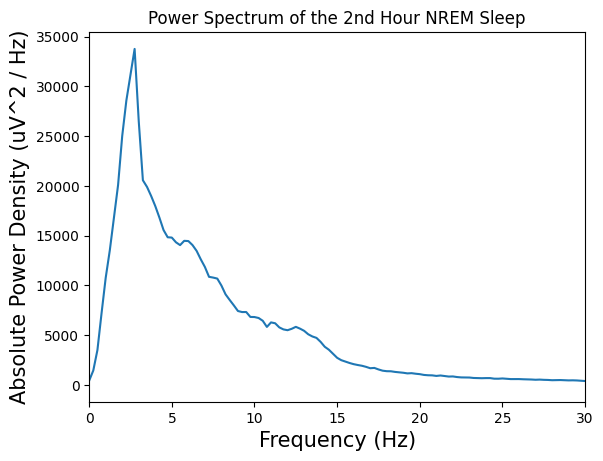

In [17]:
# Plot the spectrum or whatever you want to work on the data, you can tell gpt or other AI tools to help with the following 
from scipy.signal import welch
freq, psd = welch(x=nrem_state_cropped_data_all, fs=signal_data_sf, window='hann', nperseg=1024)

import matplotlib.pyplot as plt
plt.plot(freq, psd)
plt.xlim(0, 30)
plt.xlabel('Frequency (Hz)', fontsize=15)
plt.ylabel('Absolute Power Density (uV^2 / Hz)', fontsize=15)
plt.title('Power Spectrum of the 2nd Hour NREM Sleep')

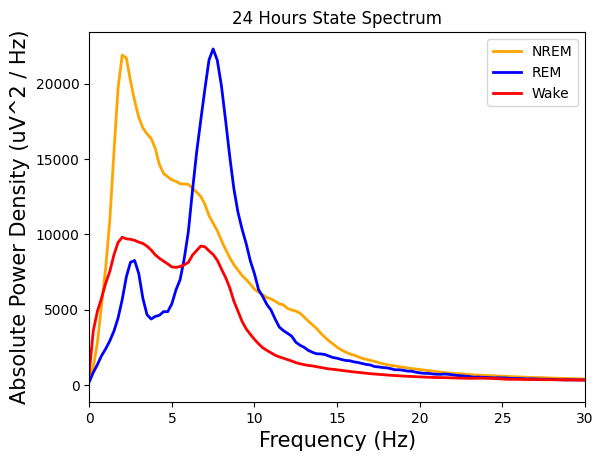

In [18]:
# All state spectrum of 24 hours data
sleep_state_group = misleep.lst2group([idx, each] for idx, each in enumerate(sleep_state))

nrem_state_group = [each for each in sleep_state_group if each[2] == 1]
nrem_state_data_group =  [signal_data[int(each[0]*signal_data_sf) : int(each[1]*signal_data_sf)] for each in nrem_state_group]
nrem_state_data_all = [item for each in nrem_state_data_group for item in each]

rem_state_group = [each for each in sleep_state_group if each[2] == 2]
rem_state_data_group =  [signal_data[int(each[0]*signal_data_sf) : int(each[1]*signal_data_sf)] for each in rem_state_group]
rem_state_data_all = [item for each in rem_state_data_group for item in each]

wake_state_group = [each for each in sleep_state_group if each[2] == 3]
wake_state_data_group =  [signal_data[int(each[0]*signal_data_sf) : int(each[1]*signal_data_sf)] for each in wake_state_group]
wake_state_data_all = [item for each in wake_state_data_group for item in each]

# Compute spectrum
freq, psd_nrem = welch(x=nrem_state_data_all, fs=signal_data_sf, window='hann', nperseg=1024)
_, psd_rem = welch(x=rem_state_data_all, fs=signal_data_sf, window='hann', nperseg=1024)
_, psd_wake = welch(x=wake_state_data_all, fs=signal_data_sf, window='hann', nperseg=1024)


# Plot spectrum
plt.plot(freq, psd_nrem, color='orange', linewidth=2, label='NREM')
plt.plot(freq, psd_rem, color='blue', linewidth=2, label='REM')
plt.plot(freq, psd_wake, color='red', lw=2, label='Wake')
plt.xlim(0, 30)
plt.xlabel('Frequency (Hz)', fontsize=15)
plt.ylabel('Absolute Power Density (uV^2 / Hz)', fontsize=15)
plt.title('24 Hours State Spectrum')
plt.legend()

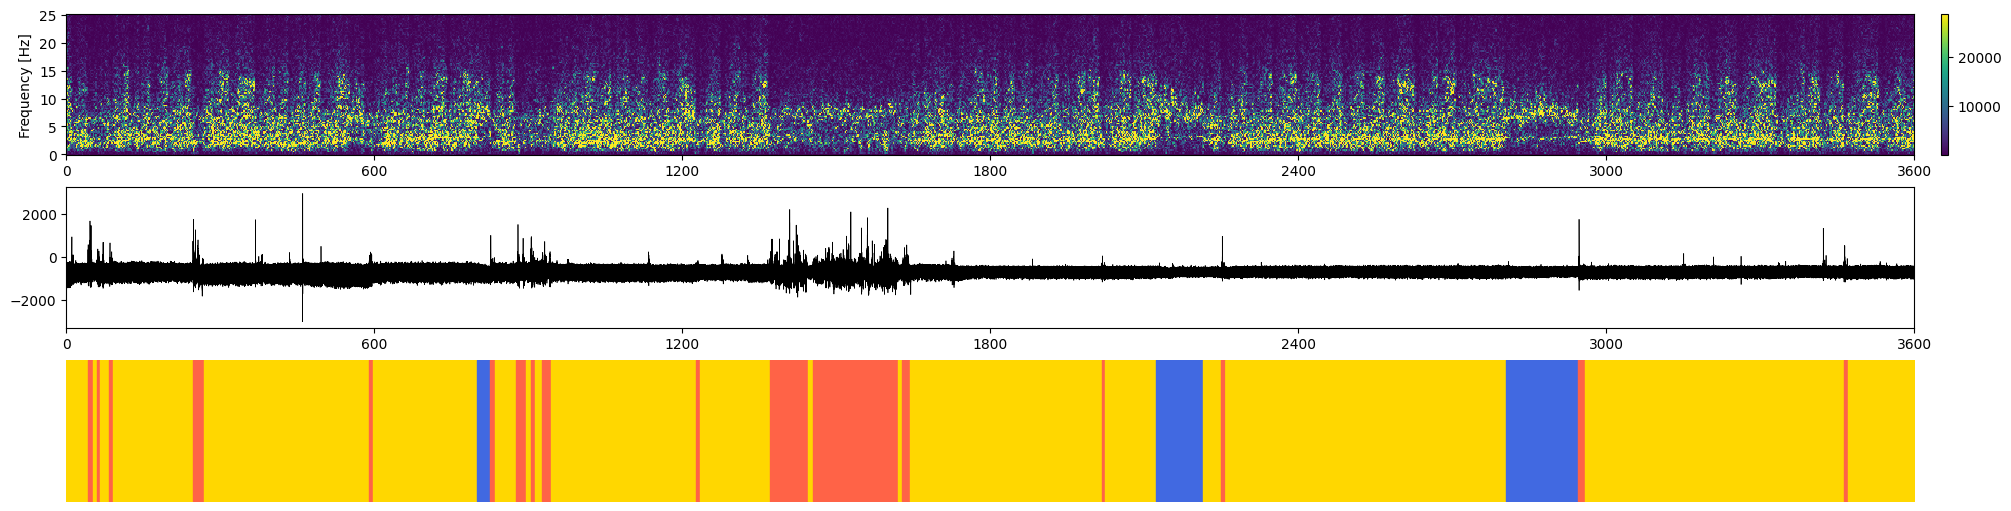

In [19]:
# plot DAN Yang paper classic figure with the 2nd hour data
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import numpy as np
eeg_p_data = signal_data_cropped
emg_diff_data = midata.signals[midata.channels.index('EMG_DIFF')][int(start_second*signal_data_sf) : int(end_second*signal_data_sf)]
freq, time_, Sxx = spectrogram(x=eeg_p_data, fs=signal_data_sf, nperseg=1024, noverlap=512)
# get 0-25 Hz
freq_idx = np.logical_and(freq >= 0, freq <=25)
freq = freq[freq_idx]
Sxx = Sxx[freq_idx]

fig, axes = plt.subplots(3, 1, figsize=(20, 5), layout='constrained')
c = axes[0].pcolormesh(time_, freq, Sxx, cmap='viridis', vmin=Sxx.min(), vmax=Sxx.max()*0.1)
fig.colorbar(c, ax=axes[0], pad=0.005)
axes[0].set_xlim(0, 3600)
axes[0].set_yticks(range(0, 26, 5), range(0, 26, 5))
axes[0].set_xticks(range(0, 3601, 600), range(0, 3601, 600))
axes[0].set_ylabel('Frequency [Hz]')

axes[1].plot(emg_diff_data, color='black', lw=0.5)
axes[1].set_xlim(0, 3600*signal_data_sf)
axes[1].set_xticks(range(0, int(3600*signal_data_sf+1), int(signal_data_sf*600)), range(0, 3601, 600))

color_map = {1: 'gold', 2: 'royalblue', 3: 'tomato'}
for each in sleep_state_cropped_group:
    axes[2].fill_between(range(each[0], each[1]), y1=0, y2=1, color=color_map[each[2]])
axes[2].set_xlim(0, 3600)
axes[2].set_ylim(0, 1)
axes[2].set_xticks([])
axes[2].set_yticks([])
axes[2].axis('off')
plt.show()

## Use ChatGPT with Prompt

If you want to use ChatGPT to work with misleep and your sleep data, you can tell the ChatGPT the following prompts:

I am working with sleep signal data, the data may include EEG, EMG and so on, I am using 'misleep' python package to process the data, see https://github.com/BryanWang0702/misleep project.
Here is an example of misleep usage:
``` python
# Load data, use misleep.load_mat() if your data is misleep standard `mat` format, else use misleep.load_edf() if your data is standard `.edf` format
midata = misleep.load_mat(r'./example_data.mat')
# misleep.load_mat will return a MiData class, which contains 'channels', 'sf (sampling frequency)', 'time (acquisition time)' and 'signals' properties
channels = midata.channels
sf = midata.sf
ac_time = midata.time
print(
    f'MiData channels: {channels}\n',
    f'MiData sfs: {sf}\n',
    f'MiData (acquisition) time: {ac_time}\n'
)
# For most of the case, you want to get the signal data of each channel, here is an example of geting the 'EEG_P' signal from midata
# Change the channel name if you want to get other channels, like 'ACC_x' or whatever
eeg_p_channel_signal = midata.signals[channels.index('EEG_P')]

# Once you get the eeg signal, you can get the corresponding sampling frequency (sf) with the same way
eeg_p_channel_sf = midata.sf[channels.index('EEG_P')]
print(f'eeg_p_channel_signal contains {len(eeg_p_channel_signal)} data points, samling frequency is {eeg_p_channel_sf}, '
      f'so total duration (in seconds) is {len(eeg_p_channel_signal)/eeg_p_channel_sf}')
# In some cases you may want only light phase, or dark phase, or only two hours of signal data, 
# you can crop the signals with 'abusolute seconds' or 'acquisition time'

# Crop data with seting start, end second
start_time_in_second = 0
end_time_in_second = 7200
cropped_eeg_p_channel_signal = eeg_p_channel_signal[int(start_time_in_second*eeg_p_channel_sf) : int(end_time_in_second*eeg_p_channel_sf)]
print(f'eeg_p_channel_signal contains {len(eeg_p_channel_signal)} data points, total duration (in seconds) is {len(eeg_p_channel_signal)/eeg_p_channel_sf}\n'
      f'cropped_eeg_p_channel_signal contains {len(cropped_eeg_p_channel_signal)} data points, total duration (in seconds) is {len(cropped_eeg_p_channel_signal)/eeg_p_channel_sf}\n')
# Crop data with acquisition time
# First thing is transfer the acquisition time into a datetime format
from datetime import datetime
ac_time_datetime_format = datetime.strptime(ac_time, "%Y%m%d-%H:%M:%S")
print(f'ac_time in datetime format: {ac_time_datetime_format}, and we can get the year of datetime by: {ac_time_datetime_format.year}\n')

# With datetime, we can set the crop start and end time like this, just by setting the year, month, day, hour, minute and second
start_crop_time = datetime(year=ac_time_datetime_format.year, month=ac_time_datetime_format.month, 
                         day=ac_time_datetime_format.day, hour=19, minute=0, second=0)
# Or if you want to use the acquisition time as the start crop time:
# start_crop_time = ac_time_datetime_format
end_crop_time = datetime(year=ac_time_datetime_format.year, month=ac_time_datetime_format.month, 
                         day=ac_time_datetime_format.day+1, hour=7, minute=0, second=0)
print(f'you are setting the start crop time: {start_crop_time} and end crop time: {end_crop_time}\n')

# With the start crop time and end crop time, I can crop the data from the whole channel signal
# First thing is locate the crop position with the datetime
start_time_in_second = (start_crop_time - ac_time_datetime_format).total_seconds()  # Get the start position
end_time_in_second = (end_crop_time - ac_time_datetime_format).total_seconds()  # Get the end position
cropped_eeg_p_channel_signal = eeg_p_channel_signal[int(start_time_in_second*eeg_p_channel_sf) : int(end_time_in_second*eeg_p_channel_sf)]
print(f'eeg_p_channel_signal contains {len(eeg_p_channel_signal)} data points, total duration (in seconds) is {len(eeg_p_channel_signal)/eeg_p_channel_sf}\n'
      f'cropped_eeg_p_channel_signal contains {len(cropped_eeg_p_channel_signal)} data points, total duration (in seconds) is {len(cropped_eeg_p_channel_signal)/eeg_p_channel_sf}\n')
## Load annotation and get sleep state group
mianno = misleep.load_misleep_anno(r'./example_annotation.txt')
# misleep.load_misleep_anno() will return a 'MiAnno' class, which contains 'sleep_state', 'start_end' event, and single point 'marker'
sleep_state = mianno.sleep_state  # Each item is the state of each second
sleep_state_map = mianno.state_map
start_end = mianno.start_end
marker = mianno.marker
print(f'sleep state map: {sleep_state_map}')
print(f'first 20 values of sleep state: {sleep_state[:20]}')
print(f'total sleep state in second: {len(sleep_state)}')

# Also we can crop the sleep state with the same way of cropping data
start_sec = 0
end_sec = 3600
sleep_state_cropped = sleep_state[start_sec: end_sec]
print(f'cropped sleep state in second: {len(sleep_state_cropped)}')
# For start_end and marker list, you can check the data yourself and to see how to work with them

# For the most often use sleep_state, misleep offer a 'lst2group' function to organize the continious sleep state
sleep_state_group = misleep.lst2group([[idx, each] for idx, each in enumerate(sleep_state)])
# So the total number of sleep_state_group is the total transition of sleep states
print(f'Total transtions of sleep state is {len(sleep_state_group)}')
print(f'First value of sleep state group: {sleep_state_group[0]}')
print(f'The state group have 3 items, first is the state start time in second: {sleep_state_group[0][0]}, '
      f'second is the state end time in second: {sleep_state_group[0][1]}, '
      f'and the third one is the state code: {sleep_state_group[0][2]}, which you can map it back to state with the {sleep_state_map}')
print(f'So the first value of sleep state group: {sleep_state_group[0]} means this is a {sleep_state_map[sleep_state_group[0][2]]} state, '
      f'start from {sleep_state_group[0][0]}, end at {sleep_state_group[0][1]}, and the bout duration is {sleep_state_group[0][1]-sleep_state_group[0][0]}')
## Extract data with sleep state group
# As we mentioned, we can use start second and end second to extract the data from original channel data, 
# then we can use the sleep state group to extract data, because each of them is [start_second, end_second, sleep_state]

# Here is a example of extract all NREM data
# First thing is we need to all the NREM labels, we can do this by identifying the 'sleep_state==1' in the sleep state group
nrem_state_group = []
for each in sleep_state_group:
    if each[2] == 1:
        nrem_state_group.append(each)
# Or do this in one line
# nrem_state_group = [each for each in sleep_state_group if each[2] == 1]
print(f'we got {len(nrem_state_group)} NREM sleep bout')
print(f'First 10 NREM bout: {nrem_state_group[:10]}')

# TIPS:
# For each bout, it contains start_second and end_second, so we can get the bout duration of each bout
print(f'First NREM bout duraion is {nrem_state_group[0][1] - nrem_state_group[0][0]}s')
# So we can get the average bout duration of NREM state by
print(f'NREM total duration is {sum(each[1]-each[0] for each in nrem_state_group)}s')
print(f'Average bout duration of NREM sleep is {sum([each[1]-each[0] for each in nrem_state_group])/len(nrem_state_group)}')
# So for all bout NREM signal data, we can iter the nrem_state_group to get the data of each bout
nrem_state_data_lst = []
for each in nrem_state_group:
    start_sec_ = each[0]
    end_sec_ = each[1]
    nrem_bout_data = eeg_p_channel_signal[int(start_sec_*eeg_p_channel_sf) : int(end_sec_*eeg_p_channel_sf)]
    nrem_state_data_lst.append(nrem_bout_data)
# Or do this in one line
# nrem_state_data_lst = [eeg_p_channel_signal[int(each[0]*eeg_p_channel_sf) : int(each[1]*eeg_p_channel_sf)] for each in nrem_state_group]
print(f'we got {len(nrem_state_data_lst)} NREM data bout')
# If we want to conbine all bout nrem state data in one list (flat it), we can:
nrem_state_data_all = [item for each in nrem_state_data_lst for item in each]
print(f'total NREM duration: {len(nrem_state_data_all)/eeg_p_channel_sf}s')
## Data processing pipeline
# Load data and annotation file
midata = misleep.load_mat(r'./example_data.mat')
mianno = misleep.load_misleep_anno(r'./example_annotation.txt')

# Get signal data you want to work with, and the signal sampling frequency is essential for all steps
signal_data = midata.signals[midata.channels.index('EEG_P')]
signal_data_sf = midata.sf[midata.channels.index('EEG_P')]

# Get the sleep state in second
sleep_state = mianno.sleep_state

# Crop data and label if you only want to process part of data
# Here is a example if you only want to process the 2nd hour of data
start_second = 3600
end_second = 7200
signal_data_cropped = signal_data[int(start_second*signal_data_sf) : int(end_second*signal_data_sf)]
sleep_state_cropped = sleep_state[start_second: end_second]
print(f'Data total second: {len(signal_data_cropped)/signal_data_sf}, label total second: {len(sleep_state_cropped)}')
# Within the cropped data, you can extrace state data
sleep_state_cropped_group = misleep.lst2group([idx, each] for idx, each in enumerate(sleep_state_cropped))
nrem_state_cropped_group = [each for each in sleep_state_cropped_group if each[2] == 1]  # Here the '1' whthin 'each[2] == 1' means 'NREM'
nrem_state_cropped_data_group = [signal_data_cropped[int(each[0]*signal_data_sf) : int(each[1]*signal_data_sf)] for each in nrem_state_cropped_group]
nrem_state_cropped_data_all = [item for each in nrem_state_cropped_data_group for item in each]
# Plot the spectrum or whatever you want to work on the data, you can tell gpt or other AI tools to help with the following 
from scipy.signal import welch
freq, psd = welch(x=nrem_state_cropped_data_all, fs=signal_data_sf, window='hann', nperseg=1024)

import matplotlib.pyplot as plt
plt.plot(freq, psd)
plt.xlim(0, 30)
plt.xlabel('Frequency (Hz)', fontsize=15)
plt.ylabel('Absolute Power Density (uV^2 / Hz)', fontsize=15)
plt.title('Power Spectrum of the 2nd Hour NREM Sleep')
```
Now I have a data in matlab format, and a txt annotation. And now I want to plot the spectrum of all data in 3 states (wake nrem and rem), please show me the code to do this start from loading data and label.

### ChatGPT Result

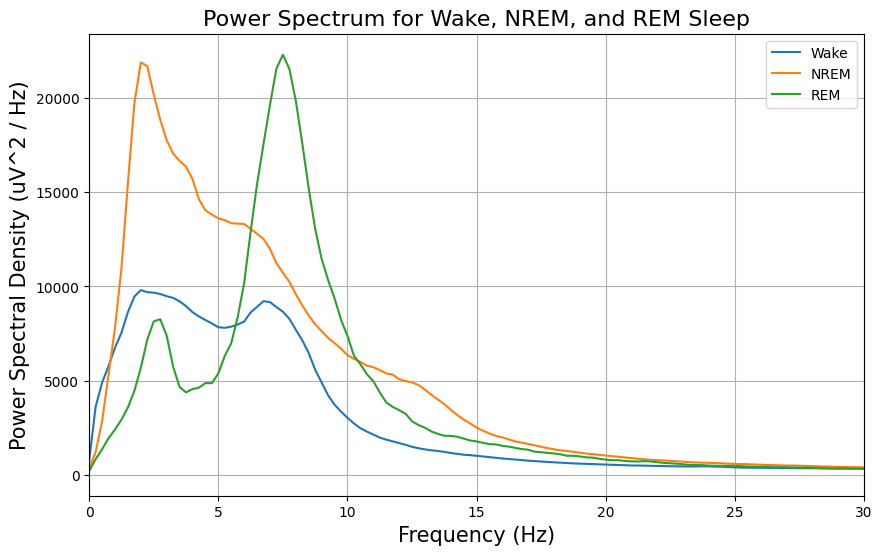

In [2]:
import misleep
import matplotlib.pyplot as plt
from scipy.signal import welch

# Step 1: Load the data and annotation
midata = misleep.load_mat(r'./example_data.mat')  # Your EEG data in MATLAB format
mianno = misleep.load_misleep_anno(r'./example_annotation.txt')  # Your annotation data

# Step 2: Get the EEG signal data (assumed to be in the 'EEG_P' channel)
channels = midata.channels
signal_data = midata.signals[channels.index('EEG_P')]
signal_data_sf = midata.sf[channels.index('EEG_P')]  # Sampling frequency of the EEG signal

# Step 3: Get the sleep state data (Wake, NREM, REM states)
sleep_state = mianno.sleep_state  # The sleep state at each second
sleep_state_map = mianno.state_map  # The mapping of sleep states (e.g., {0: 'Wake', 1: 'NREM', 2: 'REM'})

# Step 4: Separate the data by sleep state (Wake, NREM, and REM)
sleep_state_group = misleep.lst2group([[idx, each] for idx, each in enumerate(sleep_state)])

# Separate NREM, REM, and Wake data based on the sleep state
wake_state_group = [each for each in sleep_state_group if each[2] == 3]  # Wake state
nrem_state_group = [each for each in sleep_state_group if each[2] == 1]  # NREM state
rem_state_group = [each for each in sleep_state_group if each[2] == 2]  # REM state

# Step 5: Extract the data for each state (Wake, NREM, and REM)
def extract_state_data(state_group):
    state_data_lst = []
    for each in state_group:
        start_sec = each[0]
        end_sec = each[1]
        state_bout_data = signal_data[int(start_sec * signal_data_sf): int(end_sec * signal_data_sf)]
        state_data_lst.append(state_bout_data)
    return [item for each in state_data_lst for item in each]  # Flatten the list

# Extract Wake, NREM, and REM data
wake_data = extract_state_data(wake_state_group)
nrem_data = extract_state_data(nrem_state_group)
rem_data = extract_state_data(rem_state_group)

# Step 6: Plot the Power Spectrum for each state (Wake, NREM, REM)

# Compute power spectral density using Welch's method
def plot_psd(data, state_name):
    freq, psd = welch(data, fs=signal_data_sf, window='hann', nperseg=1024)
    plt.plot(freq, psd, label=f'{state_name}')

# Plot power spectrum for Wake, NREM, and REM
plt.figure(figsize=(10, 6))
plot_psd(wake_data, 'Wake')
plot_psd(nrem_data, 'NREM')
plot_psd(rem_data, 'REM')

# Customize plot
plt.xlim(0, 30)  # Limit the frequency range to 0-30 Hz
plt.xlabel('Frequency (Hz)', fontsize=15)
plt.ylabel('Power Spectral Density (uV^2 / Hz)', fontsize=15)
plt.title('Power Spectrum for Wake, NREM, and REM Sleep', fontsize=16)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()
